<a href="https://colab.research.google.com/github/dhiraj160720/dhiraj160720.github.io/blob/master/GRIP_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
# we can also load the dataset directly by running this command

#iris = load_iris()
#df = pd.DataFrame(iris.data,columns=iris.feature_names)

iris = pd.read_csv("/content/Iris.csv")
iris.shape

(150, 6)

Check if the data has any null values

In [3]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Summary of data

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['Species'].describe()

count                 150
unique                  3
top       Iris-versicolor
freq                   50
Name: Species, dtype: object

In [7]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


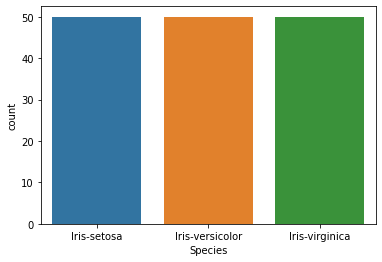

In [9]:
sns.countplot(data = iris, x = 'Species')

In [10]:
iris.SepalLengthCm[iris['Species'] == 'Iris-virginica']

100    6.3
101    5.8
102    7.1
103    6.3
104    6.5
105    7.6
106    4.9
107    7.3
108    6.7
109    7.2
110    6.5
111    6.4
112    6.8
113    5.7
114    5.8
115    6.4
116    6.5
117    7.7
118    7.7
119    6.0
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, dtype: float64

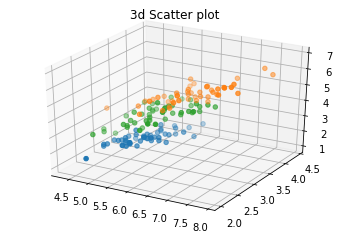

In [11]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(iris.SepalLengthCm[iris['Species']=='Iris-setosa'], iris.SepalWidthCm[iris['Species']=='Iris-setosa'], iris.PetalLengthCm[iris['Species']=='Iris-setosa'] )
ax.scatter(iris.SepalLengthCm[iris['Species']=='Iris-virginica'], iris.SepalWidthCm[iris['Species']=='Iris-virginica'], iris.PetalLengthCm[iris['Species']=='Iris-virginica'] )
ax.scatter(iris.SepalLengthCm[iris['Species']=='Iris-versicolor'], iris.SepalWidthCm[iris['Species']=='Iris-versicolor'], iris.PetalLengthCm[iris['Species']=='Iris-versicolor'] )

ax.set_title('3d Scatter plot')
plt.show()


In [ ]:
#sns.pairplot(iris, hue = 'Species', size = 3)

In [13]:
from sklearn.preprocessing import LabelEncoder
le_Species = LabelEncoder()
iris['species'] = le_Species.fit_transform(iris['Species'])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [14]:
iris = iris.drop(['Species'], axis = 'columns')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


Finding the optimum number of clusters for k-means classification

In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris)
    sse.append(km.inertia_)

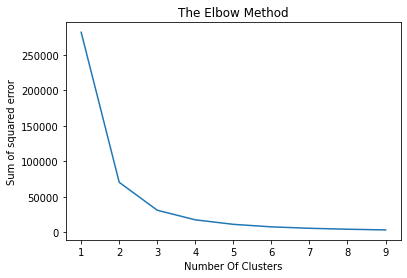

In [16]:
#Plotting the results and observing the elbow 
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**Thus we can see how the above graph represents elbow and thus from the above graph i.e. from 'The Elbow Method', the optimum number of clusters obtained is 3** 

In [17]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(iris)
yp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
iris['cluster'] = yp
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species,cluster
0,1,5.1,3.5,1.4,0.2,0,2
1,2,4.9,3.0,1.4,0.2,0,2
2,3,4.7,3.2,1.3,0.2,0,2
3,4,4.6,3.1,1.5,0.2,0,2
4,5,5.0,3.6,1.4,0.2,0,2


In [19]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species,cluster
0,1,5.1,3.5,1.4,0.2,0,2
1,2,4.9,3.0,1.4,0.2,0,2
2,3,4.7,3.2,1.3,0.2,0,2
3,4,4.6,3.1,1.5,0.2,0,2
4,5,5.0,3.6,1.4,0.2,0,2
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,1
146,147,6.3,2.5,5.0,1.9,2,1
147,148,6.5,3.0,5.2,2.0,2,1
148,149,6.2,3.4,5.4,2.3,2,1


In [20]:
iris.cluster.unique()

array([2, 0, 1], dtype=int32)

In [21]:
iris1 = iris[iris.cluster==0]
iris2 = iris[iris.cluster==1]
iris3 = iris[iris.cluster==2]

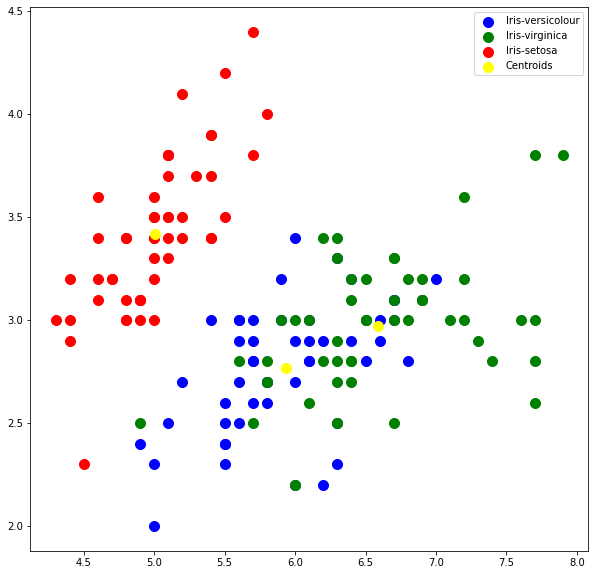

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(iris1['SepalLengthCm'],iris1['SepalWidthCm'],s=100, color='blue',label = 'Iris-versicolour')
plt.scatter(iris2['SepalLengthCm'],iris2['SepalWidthCm'],s=100, color='green',label = 'Iris-virginica')
plt.scatter(iris3['SepalLengthCm'],iris3['SepalWidthCm'],s=100, color='red',label = 'Iris-setosa')

#plotting the centroids
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

This concludes the K-means Clustering

Thankyou.